In [69]:
import pandas as pd

pd.set_option("max_colwidth", 50)

In [68]:
firms = pd.read_csv("data/law_firms.csv")
keep = ["ID", "Original Name", "Interest Represented","Web Site URL",
       "Registration Date","Calculated Cost (€)","Members Fte",
        "Activity Relevant Comm","Networking","Goals","Info Members"]

firms = firms[keep]
firms.columns = ["id", "lawfirm_name", "interests_represented","web",
       "registration_date","lobby_costs","lobby_fte",
        "activity","networking","goals","info_members"]

firms.to_csv("data/law_firms-clean.csv", index=False)
firms.sample(4)

,id,lawfirm_name,interests_represented,web,registration_date,lobby_costs,lobby_fte,activity,networking,goals,info_members
17,198879,"Maravela, Popescu & Asociații SPRL",Promotes their own interests or the collective...,https://www.mprpartners.com/,"2023-1-8, 23:00","25,000",0.95,We have attended various European Union level ...,Bucharest BaR\nInternational Bar Association (...,We are part of several organisations involved ...,NaN
23,199581,Grimaldi Studio Legale,Advances interests of their clients,www.grimaldialliance.com,"2023-11-26, 23:00","100,000",5.00,NaN,NaN,Grimaldi Alliance assists European institution...,NaN
32,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.50,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN
39,202125,Linklaters LLP,Advances interests of their clients,http://www.linklaters.com,"2012-1-29, 23:00","60,000",4.00,NaN,"Global Competition Law Centre, International C...","Linklaters LLP is a global law firm, whose law...",NaN


In [59]:
clients = pd.read_csv("data/clients.csv")
keep = ["State ID", "Client ID", "Customers - Client → Name","Proposal",
       "Money Range - Revenue Range → Min","Money Range - Revenue Range → Max"]

clients.head()
clients = clients[keep]
clients.columns = ["lawfirm_id", "client_id", "client_name" ,"proposal", "revenue_min", "revenue_max"]
clients["revenue_min"] = pd.to_numeric(clients["revenue_min"].str.replace(",",""))
clients["revenue_max"] = pd.to_numeric(clients["revenue_max"].str.replace(",",""))
clients.to_csv("data/clients-clean.csv", index=False)
clients.sample(4)

,lawfirm_id,client_id,client_name,proposal,revenue_min,revenue_max
68,206200,16891,currax pharmaceuticals llc,Public Health Policy,100000.0,199999
94,199439,17552,public sector pension investment board,EU foreign subsidies,NaN,10000
171,203150,10041,Children's Tumor Foundation (CTF),"All EU legislative proposals, policies or initiatives of relevance to the mission of CTF in Europe.",100000.0,199999
53,205179,7113,Workday,Data Act,NaN,10000


In [60]:
merged = pd.merge(firms, clients, left_on="id", right_on="lawfirm_id")

In [70]:
merged.head().T

,0,1,2,3,4
id,189719,189833,193945,194049,195878
lawfirm_name,Pilarp Juridik,Alexander H. Engelhardt,FratiniVergano - European Lawyers,Baker Botts (Belgium) L.L.P.,Hogan Lovells International LLP
interests_represented,Advances interests of their clients,Advances interests of their clients,Advances interests of their clients,Advances interests of their clients,Advances interests of their clients
web,NaN,www.engelhardt.law,http://www.fratinivergano.eu/en/,https://www.bakerbotts.com/,http://www.hoganlovells.com
registration_date,"2023-1-25, 23:00","2022-5-1, 22:00","2021-11-4, 23:00","2022-8-1, 22:00","2017-12-20, 23:00"
lobby_costs,"10,000","50,000","10,000","300,000","50,000"
lobby_fte,0.25,0.25,0.2,0.3,1.0
activity,NaN,Projects; meetings with policy makers; publica...,NaN,in-person events and webinars on EU competitio...,-DMA and DSA:\nhttps://www.hoganlovells.com/~/...
networking,NaN,NaN,NaN,"American Chamber of Commerce to the EU, Americ...","Brussels Chamber of Commerce, Trans-Atlantic B..."
goals,Att aktivt bevaka och söka påverka nuvarande t...,"Law firm, providing analysis, advice, and impl...",The firm is specialised in European and intern...,Baker Botts is a global law firm which provide...,Hogan Lovells is a global law firm offering ex...


In [71]:
merged.sample(3).T

,141,80,14
id,206119,203150,199380
lawfirm_name,Bird & Bird LLP Belgium,Squire Patton Boggs LLP,Dr. Christina Berking
interests_represented,Advances interests of their clients,Advances interests of their clients,Advances interests of their clients
web,https://www.twobirds.com/en/about,http://www.squirepattonboggs.com/,https://buse.de/anwaelte/christina-berking/
registration_date,"2018-9-20, 22:00","2016-7-31, 22:00","2023-10-24, 22:00"
lobby_costs,"325,000","800,000","25,000"
lobby_fte,3.5,14.0,0.5
activity,"Since July 2018, Bird & Bird publishes a Regul...",We currently do not have any related communica...,"Commission expert sub-group on ""dialogue with ..."
networking,International Trademark Association (INTA)\nL'...,AECA - The American European Community Associa...,Interessengemeinschaft Deutscher Kunsthandel (...
goals,Bird & Bird is an international law firm with ...,Squire Patton Boggs is a full service global l...,Dr. Christina Berking vertritt die Interesseng...


In [81]:
# keywords from the proposal cell
pd.Series([x.lower() for sublist in merged.proposal.str.split().to_list() for x in sublist]).value_counts().head(50)

and               87
of                79
the               73
eu                72
regulation        52
de                32
-                 31
on                30
act               27
digital           27
to                27
in                26
for               26
directive         24
data              23
policy            19
european          17
markets           16
(eu)              15
la                15
services          14
policies          14
•                 14
legislation       13
des               13
financial         12
initiatives       11
en                11
sustainable       11
pharmaceutical    11
et                11
revision          10
les               10
legislative       10
a                 10
energy             9
intelligence       9
artificial         9
or                 9
all                9
review             9
implementation     8
proposals,         8
relevance          8
commission         8
protection         8
act,               8
européenne   

In [82]:
merged.query("proposal.str.contains('energy', case=False)")

,id,lawfirm_name,interests_represented,web,registration_date,lobby_costs,lobby_fte,activity,networking,goals,info_members,lawfirm_id,client_id,client_name,proposal,revenue_min,revenue_max
10,198603,SMM Legal Maciak Mataczyński Czech sp.k.,Advances interests of their clients,www.smmlegal.pl,"2023-12-13, 23:00","10,000",0.2,NaN,NaN,Kancelaria prawna zapewniająca profesjonalne w...,Dwóch współpracowników (prawników posiadającyc...,198603,16873,polish association of tire recyclers (patr),"Energy efficiency, Renewable energy, Energy st...",10000.0,24999
17,199439,Freshfields Bruckhaus Deringer LLP,Advances interests of their clients,http://www.freshfields.com/en/global,"2015-10-21, 22:00","570,000",5.0,We work with our lawyers globally to share ins...,American Chamber of Commerce to the European U...,We are a global law firm with a long-standing ...,While Freshfields has 22 people engaged in act...,199439,14445,global infrastructure investor association,Investment in Infrastructure (primarily transp...,25000.0,49999
23,199439,Freshfields Bruckhaus Deringer LLP,Advances interests of their clients,http://www.freshfields.com/en/global,"2015-10-21, 22:00","570,000",5.0,We work with our lawyers globally to share ins...,American Chamber of Commerce to the European U...,We are a global law firm with a long-standing ...,While Freshfields has 22 people engaged in act...,199439,14447,"futures industry association, inc. (fia)",All legislative and non-legislative initiative...,50000.0,99999
61,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,17405,"infinium operations, llc",Revision of the Renewable Energy Directive II;...,300000.0,399999
62,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,14088,ingevity corporation,Revision of the Renewable Energy Directive II,50000.0,99999
63,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,17404,nuseed europe ltd,Revision of the Renewable Energy Directive II;...,300000.0,399999
67,201433,Ijdelea & Associates SPRL,Advances interests of their clients,https://ijdelea.ro/,"2023-3-14, 23:00","10,000",1.0,IA aims to provide general legal assistance to...,IA is a member of Tag Alliances. \r\nhttps://w...,We are a law firm based in Romania. We provide...,NaN,201433,16240,black sea oil & gas sa,Letters in connection with Council Regulation ...,NaN,10000
163,206120,Gide,Advances interests of their clients,https://www.gide.com/,"2016-4-18, 22:00","445,000",2.0,NaN,-Membre d'Invest Europe\n-Membre du Comité nat...,"Notre clientèle, composée de sociétés national...","Pour la plupart des personnes concernées, les ...",206120,7847,Avril SCA,"RED, FQD, ILUC, Bioenergy policy, Decarbonisat...",50000.0,99999


In [88]:
merged.query("lawfirm_name == 'Alber & Geiger'")

,id,lawfirm_name,interests_represented,web,registration_date,lobby_costs,lobby_fte,activity,networking,goals,info_members,lawfirm_id,client_id,client_name,proposal,revenue_min,revenue_max
60,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,14150,embassy of india,"EU-India Free Trade Agreement, EU-India Bilate...",300000.0,399999
61,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,17405,"infinium operations, llc",Revision of the Renewable Energy Directive II;...,300000.0,399999
62,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,14088,ingevity corporation,Revision of the Renewable Energy Directive II,50000.0,99999
63,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,17404,nuseed europe ltd,Revision of the Renewable Energy Directive II;...,300000.0,399999
64,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,16318,west pharmaceutical services,PFAS Restriction; REACH Review; Medical Device...,300000.0,399999
65,201083,Alber & Geiger,Advances interests of their clients,https://albergeiger.com,"2011-9-18, 22:00","1,850,000",12.5,NaN,NaN,Alber & Geiger is a leading EU government rela...,NaN,201083,1917,Huawei,NIS Directive and Application of the EU Toolbo...,600000.0,699999


<Axes: title={'center': 'Law firm with the largest lobby incomes'}, ylabel='lawfirm_name'>

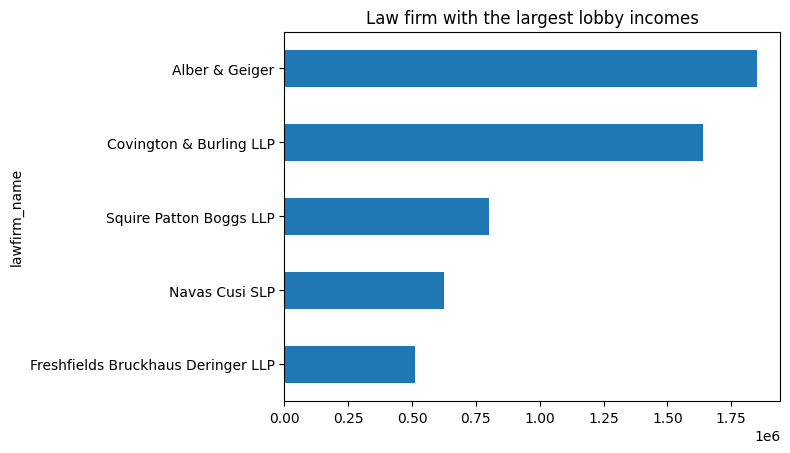

In [92]:
merged.groupby("lawfirm_name")["revenue_min"].sum()\
    .sort_values(ascending=False).head(5).sort_values()\
    .plot.barh(title="Law firms with the largest lobby income")